In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'

house_prices = pd.read_csv(url,sep=",")
house_prices = house_prices.drop(house_prices.columns[0], axis=1)
house_prices.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [4]:
#Checking for Null Values

house_prices.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [5]:
#EDA

print(house_prices.describe())

              Sqft       Floor  TotalFloor     Bedroom  Living.Room  \
count   645.000000  645.000000  645.000000  645.000000   645.000000   
mean   1527.656260    5.939535   10.855814    2.837209     1.813953   
std     767.386531    3.884721    4.996208    1.010740     0.462364   
min     359.358000    1.000000    1.000000    1.000000     0.000000   
25%     925.080000    3.000000    7.000000    2.000000     2.000000   
50%    1423.200000    5.000000   12.000000    3.000000     2.000000   
75%    1892.856000    8.000000   14.000000    4.000000     2.000000   
max    5856.468000   22.000000   38.000000    7.000000     4.000000   

         Bathroom          Price  
count  645.000000     645.000000  
mean     1.810853   61986.823256  
std      0.683574   35635.091007  
min      0.000000    6100.000000  
25%      1.000000   39000.000000  
50%      2.000000   50000.000000  
75%      2.000000   75000.000000  
max      5.000000  250000.000000  


C:\Users\vmraj\AppData\Local\Temp\ipykernel_12248\2336746085.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_prices['Price'], bins = 30)


<AxesSubplot: xlabel='Price', ylabel='Density'>

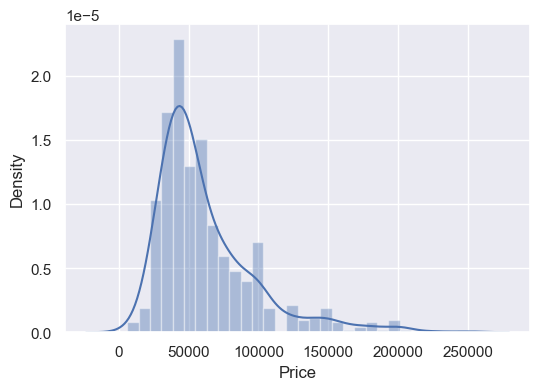

In [6]:
# Getting an idea about outliers in Target variable

sns.set(rc = {'figure.figsize' : (6,4)})
sns.distplot(house_prices['Price'], bins = 30)

In [7]:
# Removing outliers

house_prices = house_prices[house_prices['Price']<120000]

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12248\2336746085.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_prices['Price'], bins = 30)


<AxesSubplot: xlabel='Price', ylabel='Density'>

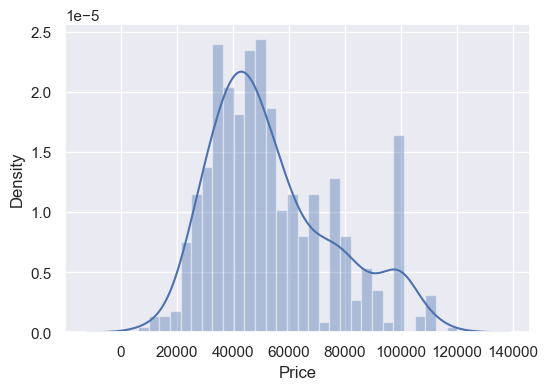

In [8]:
# Getting an idea about outliers in Target variable

sns.set(rc = {'figure.figsize' : (6,4)})
sns.distplot(house_prices['Price'], bins = 30)

In [9]:
scaler = MinMaxScaler()

# Transform the data
scaled = scaler.fit_transform(house_prices)
print('Scaled Output : \n',scaled)

Scaled Output : 
 [[0.25583982 0.04761905 0.23076923 ... 0.66666667 0.5        0.4907857 ]
 [0.55506118 0.19047619 0.23076923 ... 0.66666667 0.5        0.63126103]
 [0.243604   0.19047619 0.23076923 ... 0.66666667 0.25       0.45566686]
 ...
 [0.11902113 0.57142857 0.5        ... 0.33333333 0.25       0.34153065]
 [0.42157953 0.0952381  0.5        ... 0.66666667 0.5        0.51712482]
 [0.31813126 0.23809524 0.23076923 ... 0.66666667 0.25       0.26251328]]


In [10]:
# Create input and output features
X = house_prices.drop(['Price'], axis=1)

y = house_prices['Price']
  
# Printing Data shape    
print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (594, 6)
Y vector dimensionality: (594,)


In [11]:
# Split into training dataset and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7) 

In [71]:
# Finding Optimal Value of k
# Empty list for appending rmse
rmse_val = []
for K in range(1,20):
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('RMSE value for k = ', K, 'is : ', error)

RMSE value for k =  1 is :  14966.389889887756
RMSE value for k =  2 is :  14999.586551935077
RMSE value for k =  3 is :  14710.300762933017
RMSE value for k =  4 is :  14905.23966718548
RMSE value for k =  5 is :  15298.486199269642
RMSE value for k =  6 is :  15499.841875620354
RMSE value for k =  7 is :  15726.724450927813
RMSE value for k =  8 is :  15474.854115071548
RMSE value for k =  9 is :  15516.332357978188
RMSE value for k =  10 is :  15520.271866151175
RMSE value for k =  11 is :  15349.680098200464
RMSE value for k =  12 is :  15544.17946324709
RMSE value for k =  13 is :  15534.698648758913
RMSE value for k =  14 is :  15496.956492126596
RMSE value for k =  15 is :  15244.295044715758
RMSE value for k =  16 is :  15018.204735214382
RMSE value for k =  17 is :  14982.290098342153
RMSE value for k =  18 is :  14928.382706794908
RMSE value for k =  19 is :  14789.604725926165


In [72]:
# Finding Optimal Value of k
from sklearn.metrics import r2_score
# Empty list for appending rmse
r2_val = []
for K in range(1,20):
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    r2_val.append(r2)
    print('R2 value for k = ', K, 'is : ', r2)

R2 value for k =  1 is :  0.5826847700521105
R2 value for k =  2 is :  0.5808314391127636
R2 value for k =  3 is :  0.5968439054299615
R2 value for k =  4 is :  0.586087966997981
R2 value for k =  5 is :  0.5639592850799909
R2 value for k =  6 is :  0.5524055835792911
R2 value for k =  7 is :  0.539206143771706
R2 value for k =  8 is :  0.5538475810978535
R2 value for k =  9 is :  0.5514526739582946
R2 value for k =  10 is :  0.5512248778349793
R2 value for k =  11 is :  0.5610361234656844
R2 value for k =  12 is :  0.5498412167060392
R2 value for k =  13 is :  0.5503901772194714
R2 value for k =  14 is :  0.5525722125479081
R2 value for k =  15 is :  0.567042949503977
R2 value for k =  16 is :  0.5797902103421502
R2 value for k =  17 is :  0.581797592329015
R2 value for k =  18 is :  0.5848016248146589
R2 value for k =  19 is :  0.5924853192245979


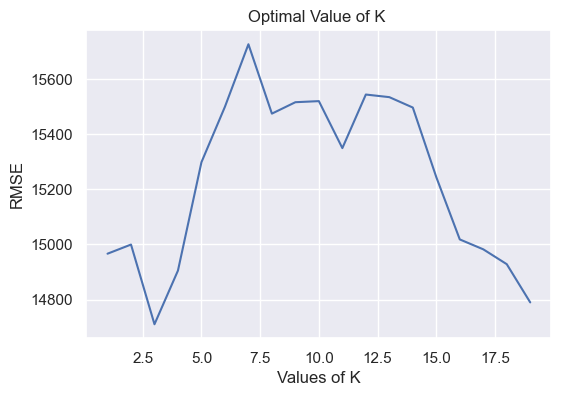

In [73]:
# Plot
k_range = range(1,20)
plt.plot(k_range, rmse_val)
plt.xlabel('Values of K')
plt.ylabel('RMSE')
plt.title('Optimal Value of K ')
plt.show()

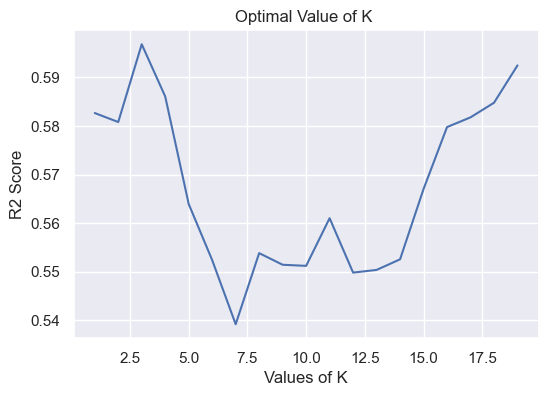

In [74]:
# Plot
k_range = range(1,20)
plt.plot(k_range, r2_val)
plt.xlabel('Values of K')
plt.ylabel('R2 Score')
plt.title('Optimal Value of K ')
plt.show()

In [76]:
# Optimal model
model = KNeighborsRegressor(n_neighbors=7)

# Fitting the model
model.fit(X_train,y_train)

# Predicting the model
y_pred = model.predict(X_test)

# RMSE and R2 Score

print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score : ',r2_score(y_test,y_pred))


RMSE :  15726.724450927813
R2 Score :  0.539206143771706
